## Load and Preview Dataset

We begin by loading the BLS dataset and inspecting its structure. This helps us understand the available columns, identify relevant features, and determine how to clean or transform the data for analysis.

In [2]:
import pandas as pd

# Load the dataset
file_path = "all_data_M_2024.xlsx"
bls_df = pd.read_excel(file_path)

# Preview first few rows
bls_df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,23.8,37.89,60.44,29990,36730,49500,78810,125720,NaN,NaN
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,58.7,82.5,#,57010,79900,122090,171610,#,NaN,NaN
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,50.48,81.01,#,47510,68800,104990,168490,#,NaN,NaN
3,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,99.24,#,#,73710,126080,206420,#,#,NaN,NaN
4,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,99.24,#,#,73710,126080,206420,#,#,NaN,NaN


In [3]:
# List all sheet names
pd.ExcelFile(file_path).sheet_names

['All May 2024 data', 'Field Descriptions', 'UpdateTime', 'Filler']

In [4]:
bls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409517 entries, 0 to 409516
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          409517 non-null  int64 
 1   AREA_TITLE    409517 non-null  object
 2   AREA_TYPE     409517 non-null  int64 
 3   PRIM_STATE    409517 non-null  object
 4   NAICS         409517 non-null  object
 5   NAICS_TITLE   409517 non-null  object
 6   I_GROUP       409517 non-null  object
 7   OWN_CODE      409517 non-null  int64 
 8   OCC_CODE      409517 non-null  object
 9   OCC_TITLE     409517 non-null  object
 10  O_GROUP       409517 non-null  object
 11  TOT_EMP       409517 non-null  object
 12  EMP_PRSE      409517 non-null  object
 13  JOBS_1000     231693 non-null  object
 14  LOC_QUOTIENT  231693 non-null  object
 15  PCT_TOTAL     170758 non-null  object
 16  PCT_RPT       170758 non-null  object
 17  H_MEAN        409517 non-null  object
 18  A_MEAN        409517 non

## Identify Developer-Related Occupations

Before filtering, we examine the unique occupation titles available in the dataset. This allows us to locate roles similar to software developers, support engineers, and other tech-related positions.

In [6]:
# Display unique occupation titles (assuming the column is named 'OCC_TITLE')
unique_titles = bls_df['OCC_TITLE'].dropna().unique()
sorted(unique_titles)

['Accountants and Auditors',
 'Actors',
 'Actors, Producers, and Directors',
 'Actuaries',
 'Acupuncturists',
 'Adhesive Bonding Machine Operators and Tenders',
 'Administrative Law Judges, Adjudicators, and Hearing Officers',
 'Administrative Services Managers',
 'Administrative Services and Facilities Managers',
 'Adult Basic Education, Adult Secondary Education, and English as a Second Language Instructors',
 'Advertising Sales Agents',
 'Advertising and Promotions Managers',
 'Advertising, Marketing, Promotions, Public Relations, and Sales Managers',
 'Aerospace Engineering and Operations Technologists and Technicians',
 'Aerospace Engineers',
 'Agents and Business Managers of Artists, Performers, and Athletes',
 'Agricultural Engineers',
 'Agricultural Equipment Operators',
 'Agricultural Inspectors',
 'Agricultural Sciences Teachers, Postsecondary',
 'Agricultural Technicians',
 'Agricultural Workers',
 'Agricultural Workers, All Other',
 'Agricultural and Food Science Technician

## Accurately Filter Tech-Related Occupations

We refine our filter by applying regular expression boundaries to better match only tech-related job titles. This avoids over-matching partial words and unrelated occupations.

In [8]:
import re

# Refined pattern for IT and tech-related jobs
pattern = r'\b(software|developer|computer|data|it|information|technology|programmer|engineer|web|cyber)\b'

# Apply regex-based filtering
tech_combined_df = bls_df[bls_df['OCC_TITLE'].astype(str).str.lower().str.contains(pattern, flags=re.IGNORECASE, regex=True)]

# Preview result
print("Final tech-related dataset shape:", tech_combined_df.shape)
tech_combined_df[['OCC_CODE', 'OCC_TITLE']].drop_duplicates().sort_values('OCC_TITLE').head(20)

C:\Users\ggold\AppData\Local\Temp\ipykernel_22064\1098437487.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tech_combined_df = bls_df[bls_df['OCC_TITLE'].astype(str).str.lower().str.contains(pattern, flags=re.IGNORECASE, regex=True)]


Final tech-related dataset shape: (21696, 32)


,OCC_CODE,OCC_TITLE
187,17-2060,Computer Hardware Engineers
188,17-2061,Computer Hardware Engineers
143,15-1241,Computer Network Architects
140,15-1231,Computer Network Support Specialists
1300,51-9161,Computer Numerically Controlled Tool Operators
1299,51-9160,Computer Numerically Controlled Tool Operators...
1301,51-9162,Computer Numerically Controlled Tool Programmers
133,15-1200,Computer Occupations
154,15-1299,"Computer Occupations, All Other"
148,15-1251,Computer Programmers


In [9]:
tech_combined_df['OCC_TITLE'].nunique()

37

In [10]:
tech_combined_df['OCC_TITLE'].value_counts()

OCC_TITLE
Receptionists and Information Clerks                              1385
Computer and Information Systems Managers                         1337
Data Scientists                                                   1018
Computer and Mathematical Occupations                             1011
Computer User Support Specialists                                  990
Network and Computer Systems Administrators                        931
Software Developers                                                923
Computer Systems Analysts                                          880
Computer Occupations, All Other                                    878
Data Entry Keyers                                                  803
Computer Network Support Specialists                               758
Information and Record Clerks, All Other                           703
Computer Network Architects                                        625
Information Security Analysts                                      

### Handling Missing Values

Before we conduct deeper analysis or modeling, we examine the dataset for missing values. Identifying incomplete columns helps us decide whether to clean, drop, or impute specific fields.

In [12]:
# Count missing values per column and display only those with missing data
missing_summary = tech_combined_df.isnull().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0]

HOURLY          21696
ANNUAL          21440
JOBS_1000       11600
LOC_QUOTIENT    11600
PCT_TOTAL       10347
PCT_RPT         10347
dtype: int64

### Cleaning and Dropping Unreliable Columns

Some columns have substantial missing data or overlap with other more complete columns. We'll remove columns that aren't essential to our analysis or can't be meaningfully imputed.

In [14]:
# Drop columns with substantial missing data and less relevance to wage or employment predictions
columns_to_drop = ['HOURLY', 'ANNUAL', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT']
tech_clean_df = tech_combined_df.drop(columns=columns_to_drop)

In [15]:
# Drop rows where A_MEAN or H_MEAN is missing
tech_clean_df = tech_clean_df.dropna(subset=['A_MEAN', 'H_MEAN']).reset_index(drop=True)
print("Cleaned tech dataset shape:", tech_clean_df.shape)

Cleaned tech dataset shape: (21696, 26)


### Filtering Rows with Missing Wage Data

To ensure meaningful salary analysis, we keep only rows where average annual (`A_MEAN`) and hourly (`H_MEAN`) wage data is available. This reduces the dataset while preserving relevant information.

### Converting Wage Columns to Numeric

Wage columns are stored as strings, which prevents numerical operations. We convert key wage-related columns to numeric values, coercing any formatting issues (like commas or non-numeric entries).

In [18]:
# List of wage columns to convert
wage_columns = [
    'A_MEAN', 'H_MEAN', 'MEAN_PRSE',
    'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
    'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]

# Convert columns to numeric (coerce errors like commas or bad entries to NaN)
for col in wage_columns:
    tech_clean_df[col] = pd.to_numeric(tech_clean_df[col], errors='coerce')

# Confirm success
tech_clean_df[wage_columns].dtypes

A_MEAN       float64
H_MEAN       float64
MEAN_PRSE    float64
H_PCT10      float64
H_PCT25      float64
H_MEDIAN     float64
H_PCT75      float64
H_PCT90      float64
A_PCT10      float64
A_PCT25      float64
A_MEDIAN     float64
A_PCT75      float64
A_PCT90      float64
dtype: object

### Wage Columns Converted

All selected wage-related columns have been successfully converted to numeric format. This allows for accurate statistical analysis, plotting, and modeling.

### Wage Distributions for Tech Occupations

To explore earnings across tech-related occupations, we begin by visualizing the distribution of average annual (`A_MEAN`) and hourly (`H_MEAN`) wages. This helps us identify outliers, trends, and central tendencies.

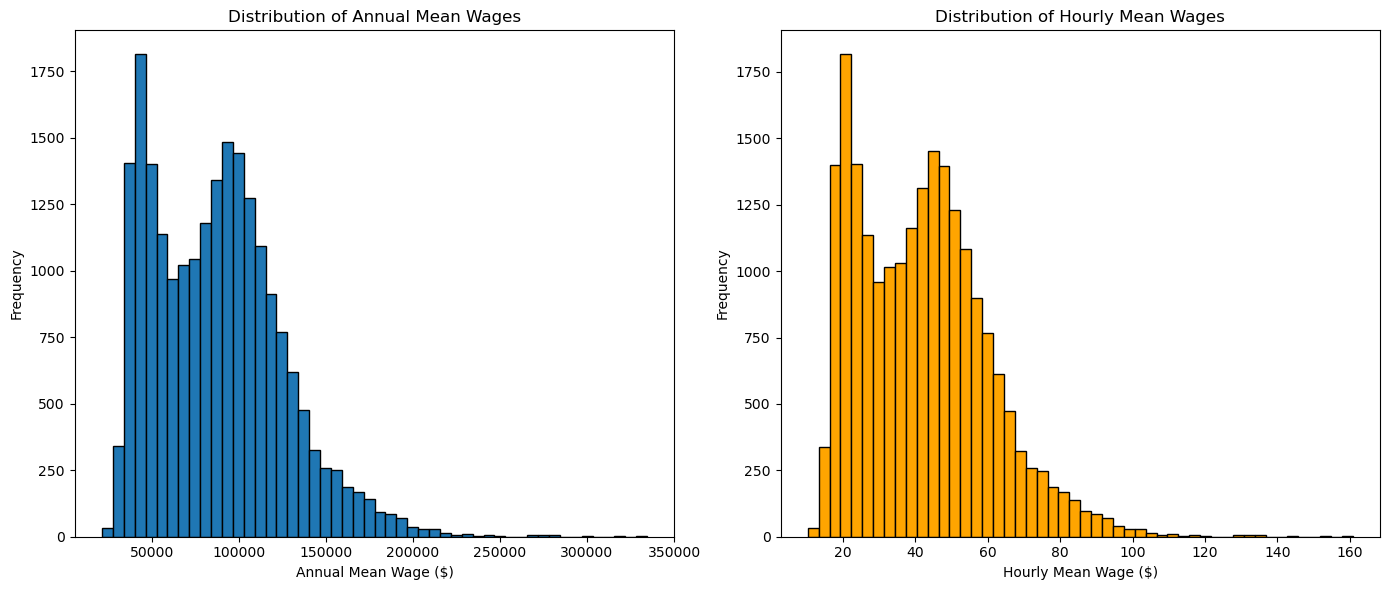

In [21]:
import matplotlib.pyplot as plt

# Set up figure
plt.figure(figsize=(14, 6))

# Annual wage histogram
plt.subplot(1, 2, 1)
tech_clean_df['A_MEAN'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution of Annual Mean Wages')
plt.xlabel('Annual Mean Wage ($)')
plt.ylabel('Frequency')

# Hourly wage histogram
plt.subplot(1, 2, 2)
tech_clean_df['H_MEAN'].plot(kind='hist', bins=50, edgecolor='black', color='orange')
plt.title('Distribution of Hourly Mean Wages')
plt.xlabel('Hourly Mean Wage ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Top-Paying Tech Occupations

This chart highlights the 15 highest-paying tech roles based on average annual wage.

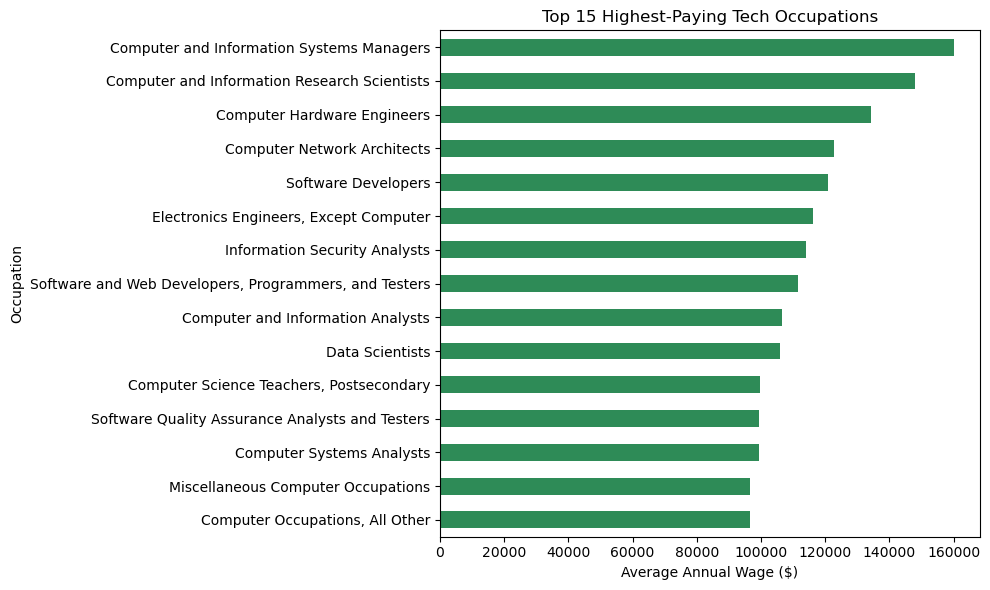

In [23]:
top_paying_roles = (
    tech_clean_df.groupby('OCC_TITLE')['A_MEAN']
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 6))
top_paying_roles.plot(kind='barh', color='seagreen')
plt.title('Top 15 Highest-Paying Tech Occupations')
plt.xlabel('Average Annual Wage ($)')
plt.ylabel('Occupation')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Job Role Distribution

We examine how frequently different tech roles appear in the dataset. This helps us understand which occupations are more represented across the U.S. in the BLS data.

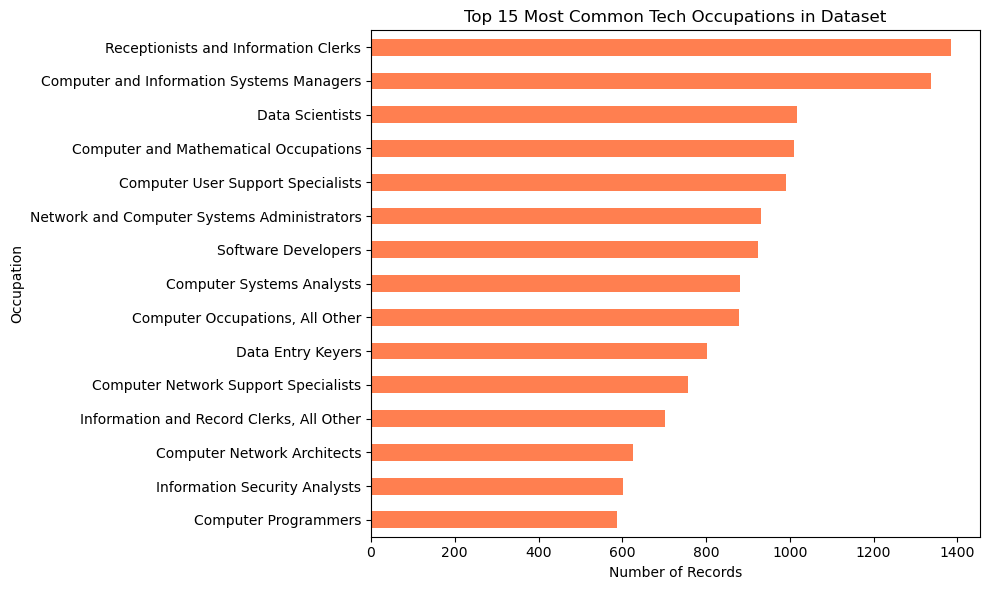

In [25]:
# Count how many times each occupation appears
occupation_counts = (
    tech_clean_df['OCC_TITLE']
    .value_counts()
    .head(15)
)

# Plot
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='barh', color='coral')
plt.title('Top 15 Most Common Tech Occupations in Dataset')
plt.xlabel('Number of Records')
plt.ylabel('Occupation')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Regional Salary Trends Across the U.S.

To examine geographic salary trends, we calculate the average annual wage (`A_MEAN`) for tech roles by state.

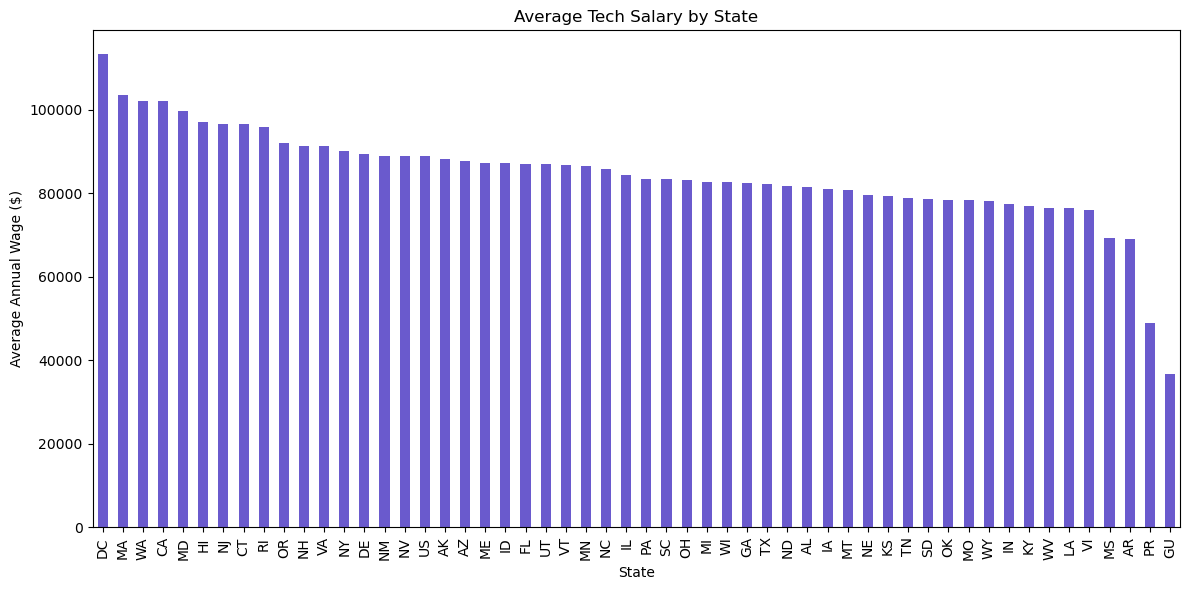

In [27]:
# Average salary by state
state_salary = tech_clean_df.groupby('PRIM_STATE')['A_MEAN'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
state_salary.plot(kind='bar', color='slateblue')
plt.title('Average Tech Salary by State')
plt.xlabel('State')
plt.ylabel('Average Annual Wage ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Do Highly-Paid Roles Also Employ the Most People?

This scatter plot compares average salary to total employment across tech roles. Roles in the top right are both highly paid and widely employed.

In [29]:
plt.figure(figsize=(12, 7))
plt.scatter(summary['total_employment'], summary['avg_salary'], alpha=0.7, edgecolor='gray')

# Annotate top 5 by employment
top_jobs = summary.sort_values(by='total_employment', ascending=False).head(5)
for i, row in top_jobs.iterrows():
    plt.text(row['total_employment'], row['avg_salary'], i, fontsize=9, ha='right')

# Annotate top 5 by salary
top_salaries = summary.sort_values(by='avg_salary', ascending=False).head(5)
for i, row in top_salaries.iterrows():
    plt.text(row['total_employment'], row['avg_salary'], i, fontsize=9, ha='left')

plt.xscale('log')
plt.title('Salary vs. Employment by Occupation')
plt.xlabel('Total Employment (log scale)')
plt.ylabel('Average Annual Wage ($)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

NameError: name 'summary' is not defined

<Figure size 1200x700 with 0 Axes>

### Grouping Occupations by Wage and Employment

This bubble chart visualizes tech occupations by average salary and total employment. Larger bubbles represent roles with greater workforce size.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Refresh OCC_GROUP (if needed)
top_occ = tech_clean_df['OCC_TITLE'].value_counts().index[:10]
summary['OCC_GROUP'] = summary.index.to_series().apply(lambda x: x if x in top_occ else 'Other')

# Filter out less relevant groups
filtered_summary = summary[
    ~summary['OCC_GROUP'].isin(['Other', 'Data Entry Keyers', 'Receptionists and Information Clerks'])
].copy()

# Scale bubble size
filtered_summary['scaled_emp'] = filtered_summary['total_employment'] / 100

# Create the bubble chart
plt.figure(figsize=(12, 7))
bubble = sns.scatterplot(
    data=filtered_summary,
    x='total_employment',
    y='avg_salary',
    hue='OCC_GROUP',
    size='scaled_emp',
    sizes=(50000, 50000),  # more dramatic bubble scaling
    alpha=0.5,
    edgecolor='gray',
    linewidth=0.6,
    palette='tab10',
    legend='full'
)

plt.xscale('log')
plt.title('Tech Occupations Grouped by Wage and Employment (Focused View)')
plt.xlabel('Total Employment (log scale)')
plt.ylabel('Average Annual Wage ($)')
plt.grid(True, linestyle='--', linewidth=0.5)

# Clean up legend (remove size dots)
handles, labels = bubble.get_legend_handles_labels()
filtered = [(h, l) for h, l in zip(handles, labels) if not l.replace('.', '', 1).isdigit()]
bubble.legend(
    handles=[h for h, _ in filtered],
    labels=[l for _, l in filtered],
    title='Occupation Group',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

### Result: Tech Occupations Grouped by Wage and Employment

This focused bubble chart visualizes tech occupations by their average annual wage and total employment, with bubble size uniformly scaled for visual impact. Roles with the highest employment cluster to the right, while those with high wages appear higher on the chart. By filtering out less relevant occupations, this view highlights key tech roles with clearer differentiation across salary and scale.

## Feature Engineering

We now select and transform the most relevant features for salary prediction. The target variable is `A_MEAN`, representing the annual mean salary. Categorical features such as `OCC_TITLE` and `NAICS_TITLE` will be encoded to be used in regression models. Employment (`TOT_EMP`) will be retained as a numeric predictor.

### Exploring Categorical Features

To prepare the dataset for modeling, we begin by reviewing key categorical columns. Understanding the number of unique values in each helps determine whether to group, encode, or transform them for predictive analysis.

In [ ]:
# Explore categorical features
print("Unique OCC_TITLEs:", tech_clean_df['OCC_TITLE'].nunique())
print("Unique AREA_TITLEs:", tech_clean_df['AREA_TITLE'].nunique())
print("Unique PRIM_STATEs:", tech_clean_df['PRIM_STATE'].nunique())

To reduce sparsity and avoid overfitting, we group less frequent occupations into an "Other" category. This allows us to focus on the most common roles while preserving interpretability. We then apply one-hot encoding to the grouped occupation titles to prepare them for modeling.

In [104]:
# Group less frequent occupations under "Other"
top_occupations = tech_clean_df['OCC_TITLE'].value_counts().index[:10]
tech_clean_df['OCC_GROUP'] = tech_clean_df['OCC_TITLE'].apply(lambda x: x if x in top_occupations else 'Other')

# One-hot encode the grouped occupation titles
df_encoded = pd.get_dummies(tech_clean_df, columns=['OCC_GROUP'], prefix='OCC')
# Confirm the new columns from OCC_GROUP one-hot encoding
df_encoded.filter(like='OCC_').columns

Index(['OCC_CODE', 'OCC_TITLE', 'OCC_Computer Occupations, All Other',
       'OCC_Computer Systems Analysts',
       'OCC_Computer User Support Specialists',
       'OCC_Computer and Information Systems Managers',
       'OCC_Computer and Mathematical Occupations', 'OCC_Data Entry Keyers',
       'OCC_Data Scientists',
       'OCC_Network and Computer Systems Administrators', 'OCC_Other',
       'OCC_Receptionists and Information Clerks', 'OCC_Software Developers'],
      dtype='object')

We now encode the state variable (`PRIM_STATE`) using one-hot encoding. Since there are only 54 unique values, this transformation preserves geographic detail without adding excessive dimensionality.

In [115]:
# One-hot encode state abbreviations
df_encoded = pd.get_dummies(df_encoded, columns=['PRIM_STATE'], prefix='STATE')

KeyError: "None of [Index(['PRIM_STATE'], dtype='object')] are in the [columns]"

In [111]:
df_encoded.filter(like='STATE_').head(3)

,STATE_AK,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,...,STATE_TX,STATE_US,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


KeyError: "None of [Index(['PRIM_STATE'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define target and features
target = 'A_MEAN'
features = ['OCC_TITLE', 'NAICS_TITLE', 'TOT_EMP']

X = filtered_df[features].copy()
y = filtered_df[target].copy()

# One-hot encode categorical variables
categorical_features = ['OCC_TITLE', 'NAICS_TITLE']
numeric_features = ['TOT_EMP']

# Build preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', 'passthrough', numeric_features)
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

## Step 6: Baseline Model – Linear Regression

We begin by training a baseline linear regression model using preprocessed features. This model will serve as a benchmark for more complex models such as Random Forest and XGBoost.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create a pipeline: preprocessing + linear regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the model
lr_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")